In [24]:
#!pip install numpy pandas matplotlib seaborn plotly scikit-learn xgboost lightgbm scipy statsmodels jinja2 nbformat


# Core Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from IPython.display import IFrame
import plotly.io as pio
from IPython.display import HTML


# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [25]:

df = pd.read_csv("earthquake_data_tsunami.csv")

# Display basic information
print("="*70)
print("GLOBAL EARTHQUAKE-TSUNAMI DATASET")
print("="*70)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Time Period: 2001-2022 (22 years)")
print(f"Target Variable: 'tsunami' (Binary Classification)")
print("\n" + "="*70)

# First look at the data
df.head(10)


GLOBAL EARTHQUAKE-TSUNAMI DATASET

Dataset Shape: 782 rows × 13 columns
Time Period: 2001-2022 (22 years)
Target Variable: 'tsunami' (Binary Classification)



magnitude  cdi  mmi   sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7   768  117  0.509  17.0   14.000   -9.7963   159.5960   
1        6.9    4    4   735   99  2.229  34.0   25.000   -4.9559   100.7380   
2        7.0    3    3   755  147  3.125  18.0  579.000  -20.0508  -178.3460   
3        7.3    5    5   833  149  1.865  21.0   37.000  -19.2918  -172.1290   
4        6.6    0    2   670  131  4.998  27.0  624.464  -25.5948   178.2780   
5        7.0    4    3   755  142  4.578  26.0  660.000  -26.0442   178.3810   
6        6.8    1    3   711  136  4.678  22.0  630.379  -25.9678   178.3630   
7        6.7    7    6   797  145  1.151  37.0   20.000    7.6712   -82.3396   
8        6.8    8    7  1179  175  2.137  92.0   20.000   18.3300  -102.9130   
9        7.6    9    8  1799  271  1.153  69.0   26.943   18.3667  -103.2520   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
5  2022     11        1  
6  2022     11        1  
7  2022     10        1  
8  2022      9        1  
9  2022      9        1

## Dataset Analysis and Overview

Understanding our data is the foundation of any successful ML project. Let's examine the structure, quality, and composition of our seismic dataset.

In [26]:
# Comprehensive data quality report
print("="*70)
print("DATA QUALITY ASSESSMENT")
print("="*70)

# Basic info
print("\n- DATASET STRUCTURE")
print(f"   • Total Records: {df.shape[0]:,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Missing values
print("\n- MISSING VALUES")
missing_count = df.isnull().sum().sum()
if missing_count == 0:
    print(f"   PERFECT! Zero missing values across all features")
else:
    print(f"   Missing values detected: {missing_count}")

# Data types
print("\n- DATA TYPES")
print(df.dtypes.value_counts())

# Duplicates
duplicates = df.duplicated().sum()
print(f"\n- DUPLICATE ROWS")
if duplicates == 0:
    print(f"   No duplicate records found")
else:
    print(f"   {duplicates} duplicate rows detected")

# Target distribution
print("\n- TARGET VARIABLE DISTRIBUTION")
tsunami_counts = df['tsunami'].value_counts()
tsunami_pct = df['tsunami'].value_counts(normalize=True) * 100
print(f"   • No Tsunami (0): {tsunami_counts[0]} ({tsunami_pct[0]:.1f}%)")
print(f"   • Tsunami (1): {tsunami_counts[1]} ({tsunami_pct[1]:.1f}%)")
print(f"   • Class Balance Ratio: 1:{tsunami_counts[0]/tsunami_counts[1]:.2f}")

print("\n" + "="*70)

# Statistical summary
print("\nSTATISTICAL SUMMARY\n")
df.describe().T.style.background_gradient(cmap='YlOrRd')

DATA QUALITY ASSESSMENT

- DATASET STRUCTURE
   • Total Records: 782
   • Total Features: 13
   • Memory Usage: 79.55 KB

- MISSING VALUES
   PERFECT! Zero missing values across all features

- DATA TYPES
int64      7
float64    6
Name: count, dtype: int64

- DUPLICATE ROWS
   No duplicate records found

- TARGET VARIABLE DISTRIBUTION
   • No Tsunami (0): 478 (61.1%)
   • Tsunami (1): 304 (38.9%)
   • Class Balance Ratio: 1:1.57


STATISTICAL SUMMARY



## Geographical distribution and Global Map with earthquacke/tsunami locations

In [27]:
df_copy = df.copy()

colors = {0: 'green', 1: 'red'}
df_copy['color'] = df_copy['tsunami'].map(colors)
df_copy['tsunami_text'] = df_copy['tsunami'].map({0: 'No Tsunami', 1: 'Tsunami'})

df_copy['hover_text'] = df_copy.apply(lambda row: 
    f"Magnitude: {row['magnitude']}<br>" +
    f"Depth: {row['depth']} km<br>" +
    f"Tsunami: {row['tsunami_text']}",
    axis=1
)

fig = go.Figure()

tsunami_yes = df_copy[df_copy['tsunami'] == 1]
fig.add_trace(go.Scattergeo(
    lat=tsunami_yes["latitude"],
    lon=tsunami_yes["longitude"],
    mode="markers",
    hoverinfo="text",
    text=tsunami_yes["hover_text"],
    name="Tsunami",
    marker=dict(
        color="red",
        size=6,
        opacity=1,
        line=dict(width=1, color='green')
    )
))

tsunami_no = df_copy[df_copy['tsunami'] == 0]
fig.add_trace(go.Scattergeo(
    lat=tsunami_no["latitude"],
    lon=tsunami_no["longitude"],
    mode="markers",
    hoverinfo="text",
    text=tsunami_no["hover_text"],
    name="No Tsunami",
    marker=dict(
        color="green",
        size=4,
        opacity=1,
        line=dict(width=0.5, color='red')
    )
))

fig.update_geos(
    projection_type="orthographic",
    landcolor="lightgray",
    oceancolor="LightBlue",
    showocean=True,
    lakecolor="LightBlue",
    showland=True,
    showcountries=True,
    countrycolor="white",
    countrywidth=0.5
)

fig.update_layout(
    title=dict(
        text="Earthquakes and Tsunami Distribution",
        x=0.5,
        font=dict(size=20)
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255,255,255,0.8)"
    ),
    margin=dict(r=10, t=80, b=10, l=10),
    height=600
)

HTML(fig.to_html())



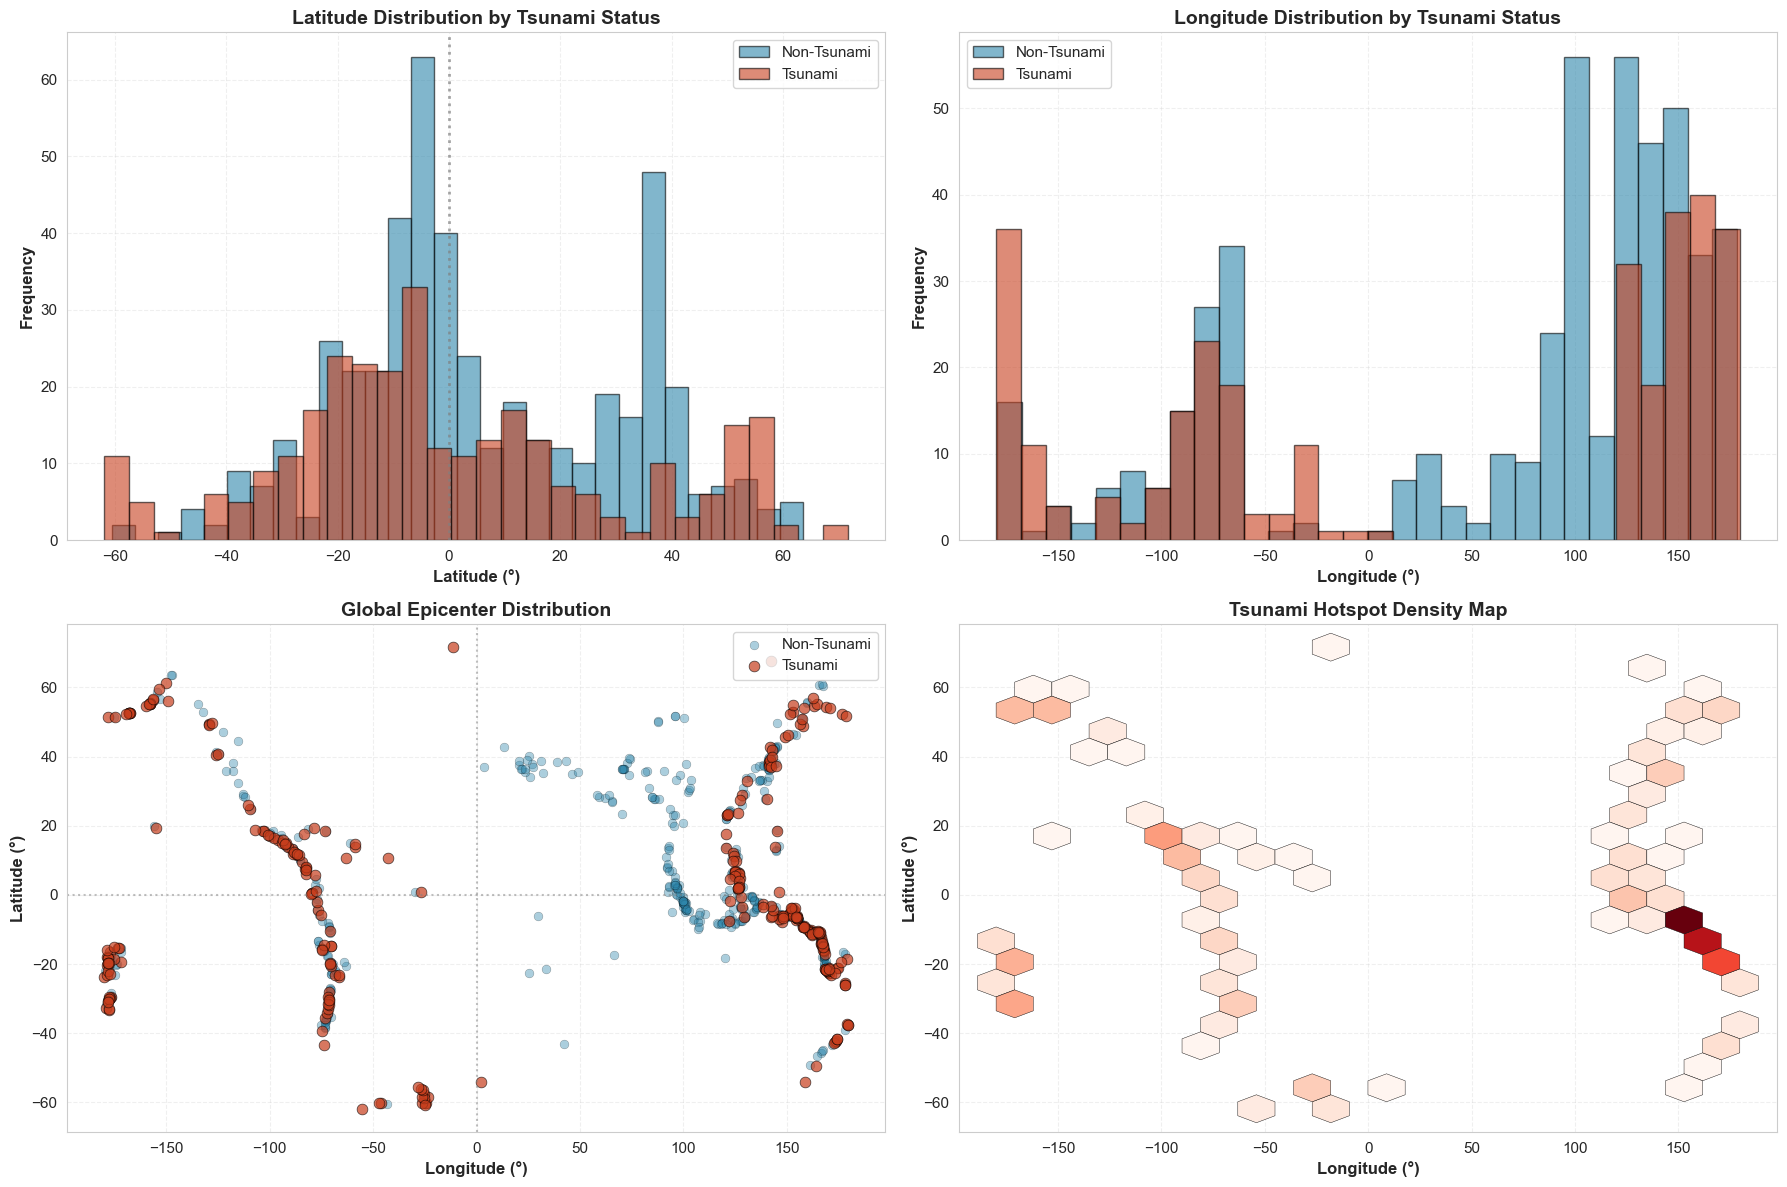

INSIGHTS: Geographic Distribution
- Pacific Ring of Fire dominates tsunami activity
- Mean Latitude (Tsunami): -0.34°
- Mean Longitude (Tsunami): 32.40°
- Tsunami concentration: Asia-Pacific region (Japan, Indonesia, Philippines)
- Secondary hotspots: South America (Chile), Alaska, New Zeland
- Latitude range with most tsunamis: -20.1° to 16.0°


In [28]:
# EDA #4: Geographic Distribution - Latitude & Longitude Patterns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top-left: Latitude distribution
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#2E86AB'), (1, 'Tsunami', '#C73E1D')]:
    data = df[df['tsunami'] == tsunami_val]['latitude']
    axes[0,0].hist(data, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0,0].set_xlabel('Latitude (°)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0,0].set_title('Latitude Distribution by Tsunami Status', fontsize=14, fontweight='bold')
axes[0,0].legend()
axes[0,0].axvline(0, color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Equator')
axes[0,0].grid(alpha=0.3, linestyle='--')

# Top-right: Longitude distribution
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#2E86AB'), (1, 'Tsunami', '#C73E1D')]:
    data = df[df['tsunami'] == tsunami_val]['longitude']
    axes[0,1].hist(data, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0,1].set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0,1].set_title('Longitude Distribution by Tsunami Status', fontsize=14, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3, linestyle='--')

# Bottom-left: 2D scatter plot
axes[1,0].scatter(df[df['tsunami']==0]['longitude'], df[df['tsunami']==0]['latitude'],
                 alpha=0.4, s=40, c='#2E86AB', edgecolors='black', linewidth=0.3, label='Non-Tsunami')
axes[1,0].scatter(df[df['tsunami']==1]['longitude'], df[df['tsunami']==1]['latitude'],
                 alpha=0.7, s=60, c='#C73E1D', edgecolors='black', linewidth=0.5, label='Tsunami')

axes[1,0].set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
axes[1,0].set_title('Global Epicenter Distribution', fontsize=14, fontweight='bold')
axes[1,0].legend(loc='upper right')
axes[1,0].grid(alpha=0.3, linestyle='--')
axes[1,0].axhline(0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
axes[1,0].axvline(0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)

# Bottom-right: 2D Density/Heatmap for tsunami events
tsunami_events = df[df['tsunami'] == 1]
axes[1,1].hexbin(tsunami_events['longitude'], tsunami_events['latitude'], 
                gridsize=20, cmap='Reds', mincnt=1, edgecolors='black', linewidths=0.3)
axes[1,1].set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
axes[1,1].set_title('Tsunami Hotspot Density Map', fontsize=14, fontweight='bold')
axes[1,1].grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Geographic insights
tsunami_events = df[df['tsunami'] == 1]
print("="*70)
print("INSIGHTS: Geographic Distribution")
print("="*70)
print(f"- Pacific Ring of Fire dominates tsunami activity")
print(f"- Mean Latitude (Tsunami): {tsunami_events['latitude'].mean():.2f}°")
print(f"- Mean Longitude (Tsunami): {tsunami_events['longitude'].mean():.2f}°")
print(f"- Tsunami concentration: Asia-Pacific region (Japan, Indonesia, Philippines)")
print(f"- Secondary hotspots: South America (Chile), Alaska, New Zeland")
print(f"- Latitude range with most tsunamis: {tsunami_events['latitude'].quantile(0.25):.1f}° to {tsunami_events['latitude'].quantile(0.75):.1f}°")
print("="*70)


## Correlation between the different features

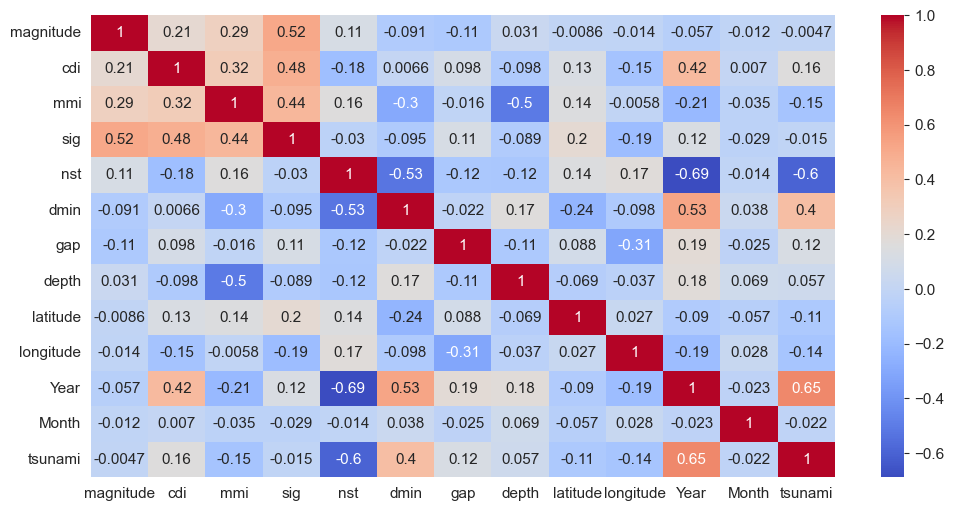

In [29]:
corr = df.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

## Target variable distribution

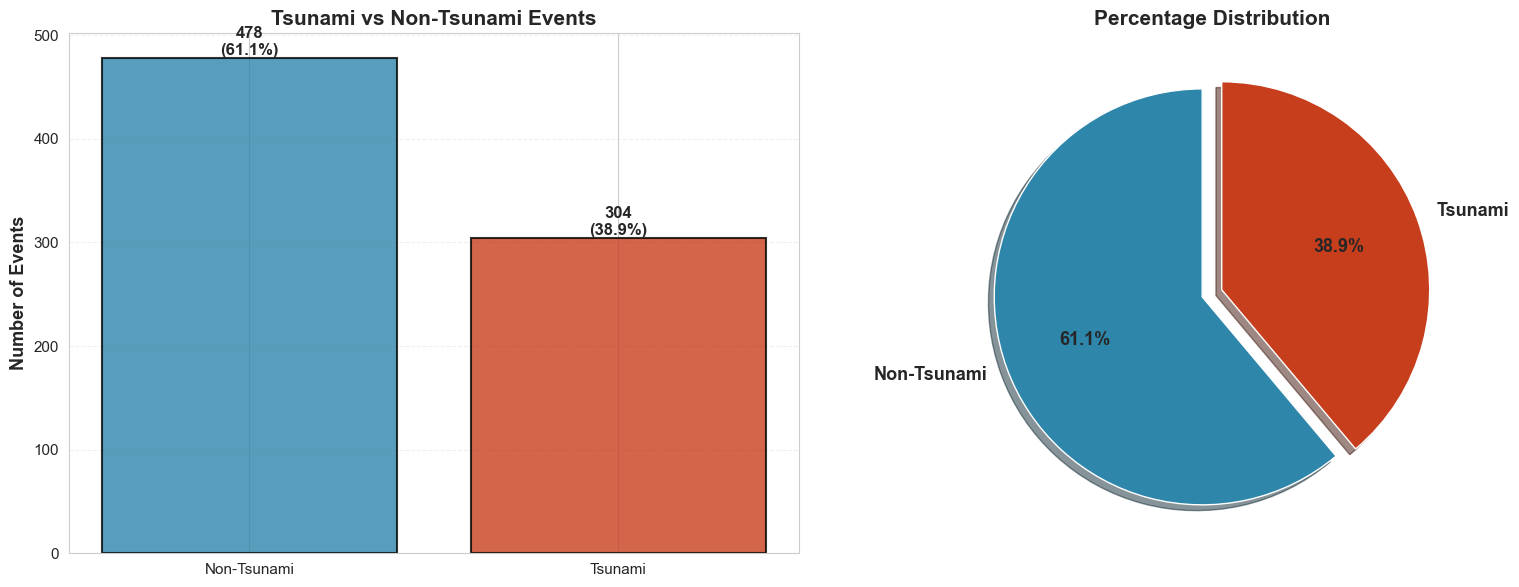

INSIGHTS: Target Distribution
- Dataset is moderately imbalanced (38.9% positive class)
- Non-Tsunami Events: 478 (61.1%)
- Tsunami Events: 304 (38.9%)
- Sufficient positive cases for robust model training
- Consider using stratified sampling and class-weighted models


In [30]:
# EDA #1: Target Variable Distribution - The Foundation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
tsunami_counts = df['tsunami'].value_counts().sort_index()
tsunami_pct = df['tsunami'].value_counts(normalize=True) * 100

colors = ['#2E86AB', '#C73E1D']
bars = axes[0].bar(['Non-Tsunami', 'Tsunami'], tsunami_counts.values, color=colors, 
                   edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0].set_ylabel('Number of Events', fontsize=13, fontweight='bold')
axes[0].set_title('Tsunami vs Non-Tsunami Events', fontsize=15, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/tsunami_counts.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie(tsunami_counts.values, labels=['Non-Tsunami', 'Tsunami'], autopct='%1.1f%%',
           colors=colors, startangle=90, explode=(0.05, 0.05), shadow=True,
           textprops={'fontsize': 13, 'fontweight': 'bold'})
axes[1].set_title('Percentage Distribution', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

# Key insights
print("="*70)
print("INSIGHTS: Target Distribution")
print("="*70)
print(f"- Dataset is moderately imbalanced ({tsunami_pct.iloc[1]:.1f}% positive class)")
print(f"- Non-Tsunami Events: {tsunami_counts.iloc[0]} ({tsunami_pct.iloc[0]:.1f}%)")
print(f"- Tsunami Events: {tsunami_counts.iloc[1]} ({tsunami_pct.iloc[1]:.1f}%)")
print(f"- Sufficient positive cases for robust model training")
print(f"- Consider using stratified sampling and class-weighted models")
print("="*70)

## Magnitude distribution analysis

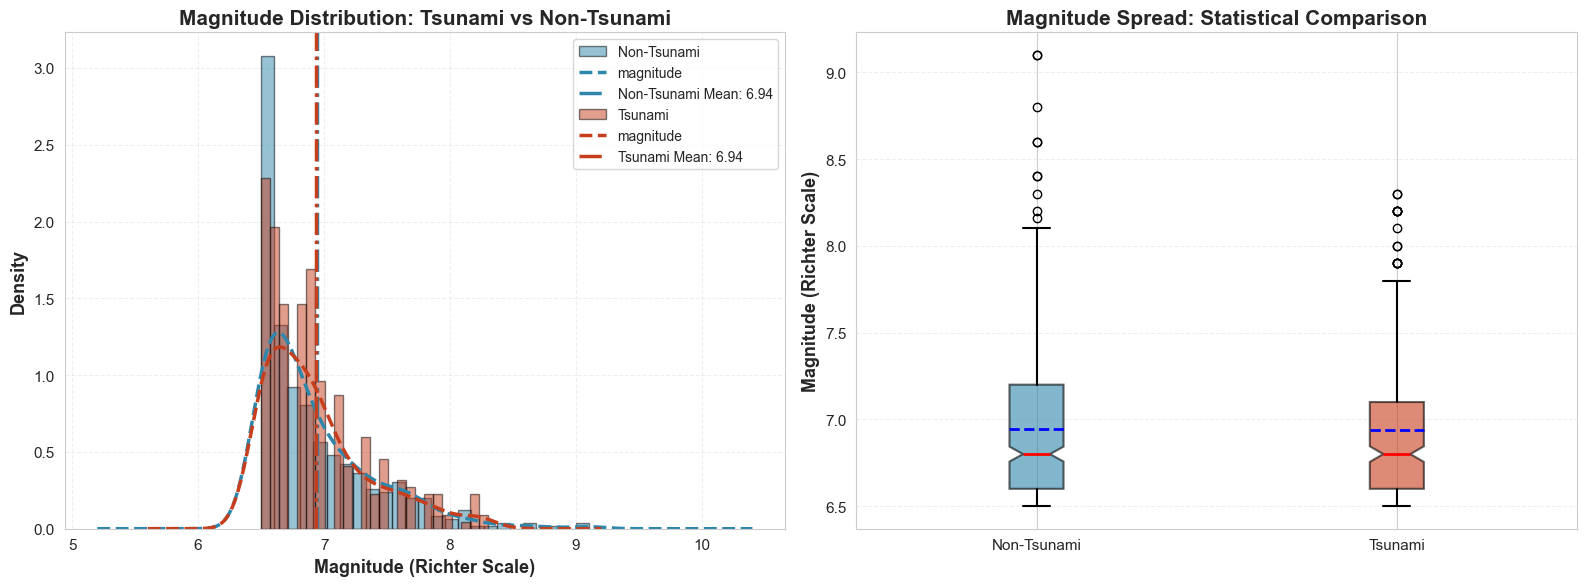

INSIGHTS: Magnitude Analysis
- Non-Tsunami Mean Magnitude: 6.943 ± 0.460
- Tsunami Mean Magnitude: 6.938 ± 0.423
- Magnitude Difference: 0.004 Richter units
- T-statistic: 0.1320 | P-value: 8.9503e-01
- No significant difference detected


In [31]:
# EDA #2: Magnitude Distribution by Tsunami Status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Distribution comparison with KDE
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#2E86AB'), (1, 'Tsunami', '#C73E1D')]:
    data = df[df['tsunami'] == tsunami_val]['magnitude']
    axes[0].hist(data, bins=25, alpha=0.5, label=label, color=color, edgecolor='black', density=True)
    data.plot(kind='kde', ax=axes[0], color=color, linewidth=2.5, linestyle='--')
    axes[0].axvline(data.mean(), color=color, linestyle='-.', linewidth=2.5, 
                    label=f'{label} Mean: {data.mean():.2f}')

axes[0].set_xlabel('Magnitude (Richter Scale)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=13, fontweight='bold')
axes[0].set_title('Magnitude Distribution: Tsunami vs Non-Tsunami', fontsize=15, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(alpha=0.3, linestyle='--')

# Right: Box plot comparison
tsunami_data = [df[df['tsunami'] == 0]['magnitude'], df[df['tsunami'] == 1]['magnitude']]
bp = axes[1].boxplot(tsunami_data, labels=['Non-Tsunami', 'Tsunami'], patch_artist=True,
                     notch=True, showmeans=True, meanline=True,
                     boxprops=dict(linewidth=1.5),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5),
                     medianprops=dict(color='red', linewidth=2),
                     meanprops=dict(color='blue', linewidth=2))

for patch, color in zip(bp['boxes'], ['#2E86AB', '#C73E1D']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

axes[1].set_ylabel('Magnitude (Richter Scale)', fontsize=13, fontweight='bold')
axes[1].set_title('Magnitude Spread: Statistical Comparison', fontsize=15, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Statistical testing
non_tsunami_mag = df[df['tsunami'] == 0]['magnitude']
tsunami_mag = df[df['tsunami'] == 1]['magnitude']
t_stat, p_value = stats.ttest_ind(non_tsunami_mag, tsunami_mag)

print("="*70)
print("INSIGHTS: Magnitude Analysis")
print("="*70)
print(f"- Non-Tsunami Mean Magnitude: {non_tsunami_mag.mean():.3f} ± {non_tsunami_mag.std():.3f}")
print(f"- Tsunami Mean Magnitude: {tsunami_mag.mean():.3f} ± {tsunami_mag.std():.3f}")
print(f"- Magnitude Difference: {abs(tsunami_mag.mean() - non_tsunami_mag.mean()):.3f} Richter units")
print(f"- T-statistic: {t_stat:.4f} | P-value: {p_value:.4e}")
if p_value < 0.05:
    print("- STATISTICALLY SIGNIFICANT difference (p < 0.05)")
    print("- Higher magnitudes are strongly associated with tsunami events!")
else:
    print("- No significant difference detected")
print("="*70)

## Temporal analysis

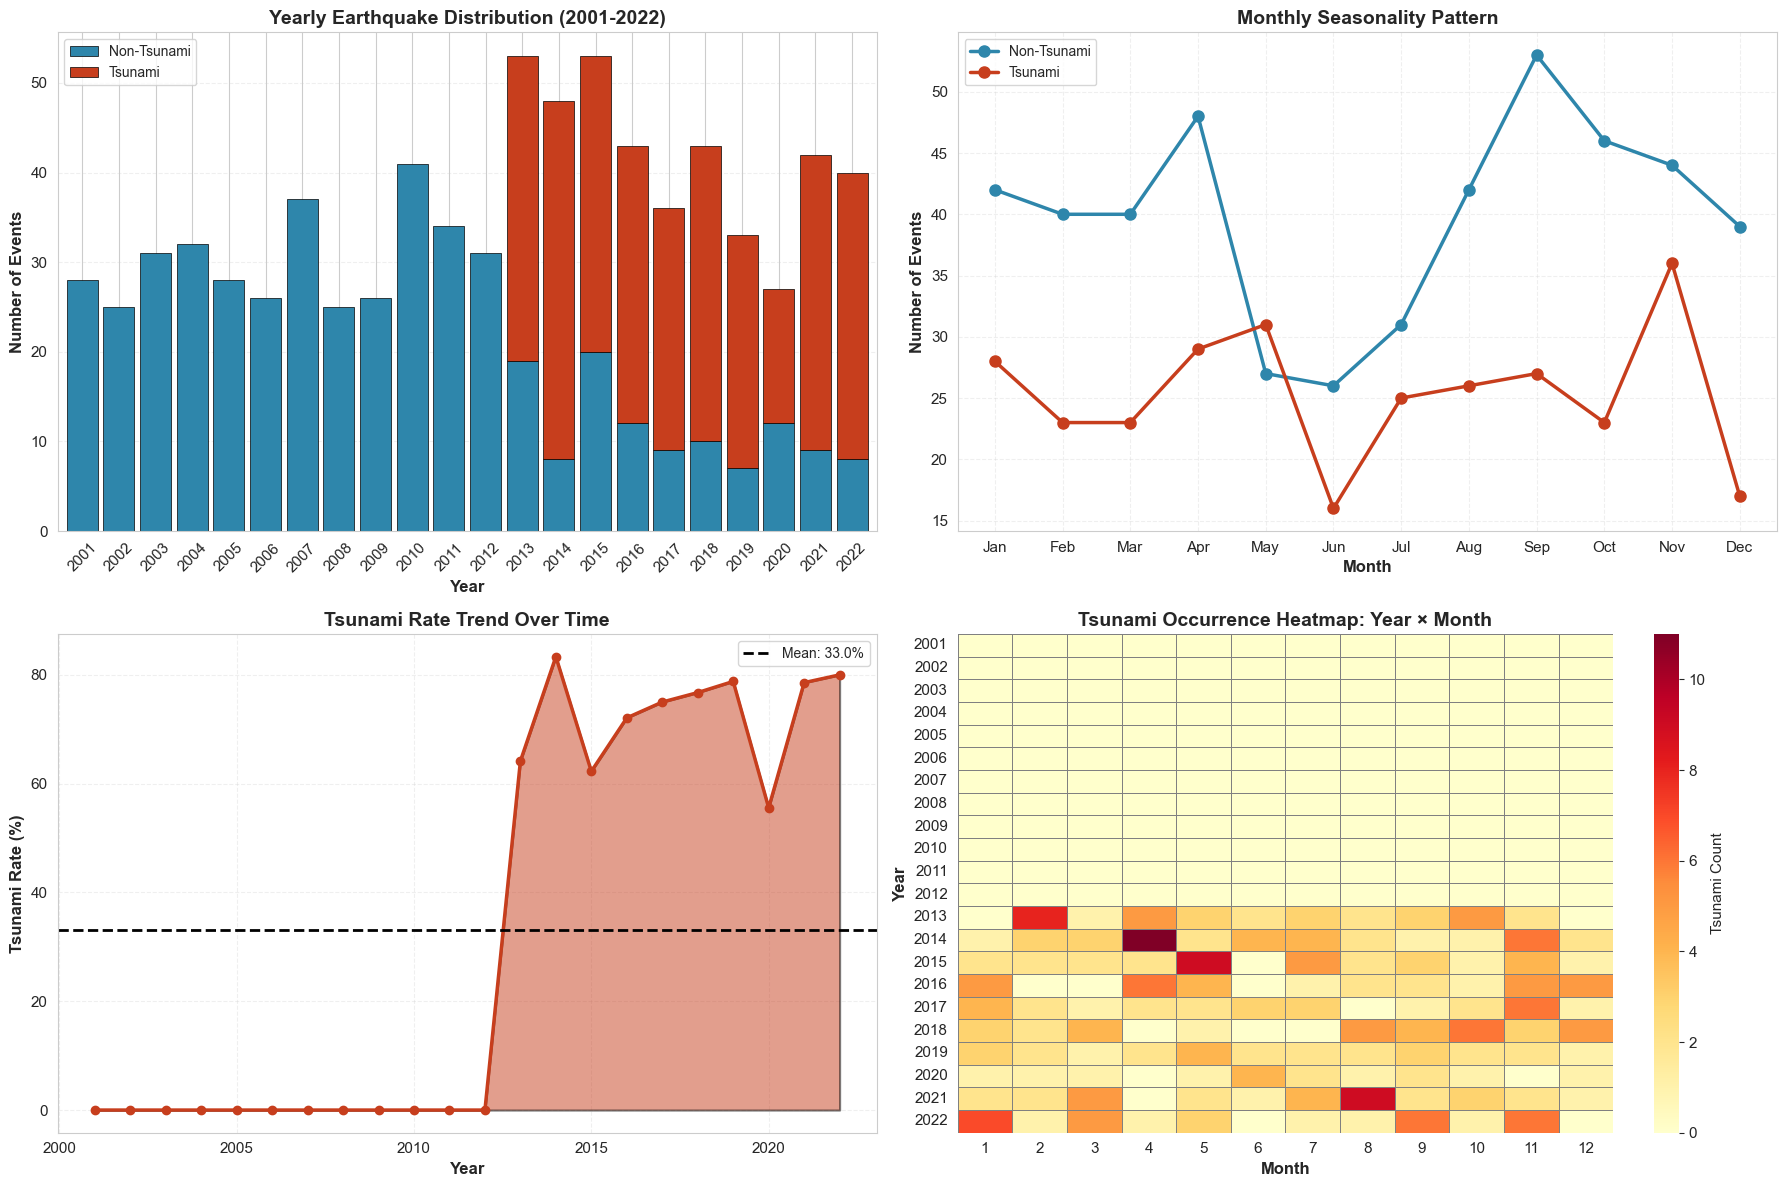

INSIGHTS: Temporal Patterns
- Peak earthquake year: 2013 (53 total events)
- Peak month across all years: Month #9 (80 events)
- Average annual tsunami rate: 33.0%
- Highest tsunami rate year: 2014 (83.3%)
- No strong seasonal pattern detected (relatively uniform monthly distribution)
- Some years show elevated activity due to major seismic sequences


In [32]:
# EDA #5: Temporal Patterns - When Do Tsunamis Occur?
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top-left: Yearly trend
yearly_data = df.groupby(['Year', 'tsunami']).size().unstack(fill_value=0)
yearly_data.plot(kind='bar', stacked=True, color=['#2E86AB', '#C73E1D'], ax=axes[0,0], 
                width=0.85, edgecolor='black', linewidth=0.5)
axes[0,0].set_title('Yearly Earthquake Distribution (2001-2022)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Number of Events', fontsize=12, fontweight='bold')
axes[0,0].legend(['Non-Tsunami', 'Tsunami'], loc='upper left', fontsize=10)
axes[0,0].grid(alpha=0.3, axis='y', linestyle='--')
axes[0,0].tick_params(axis='x', rotation=45)

# Top-right: Monthly patterns
monthly_data = df.groupby(['Month', 'tsunami']).size().unstack(fill_value=0)
monthly_data.plot(kind='line', marker='o', color=['#2E86AB', '#C73E1D'], ax=axes[0,1], 
                 linewidth=2.5, markersize=8)
axes[0,1].set_title('Monthly Seasonality Pattern', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Number of Events', fontsize=12, fontweight='bold')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0,1].legend(['Non-Tsunami', 'Tsunami'], loc='upper left', fontsize=10)
axes[0,1].grid(alpha=0.3, linestyle='--')

# Bottom-left: Tsunami rate by year
tsunami_rate_yearly = df.groupby('Year')['tsunami'].mean() * 100
axes[1,0].fill_between(tsunami_rate_yearly.index, tsunami_rate_yearly.values, 
                       color='#C73E1D', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[1,0].plot(tsunami_rate_yearly.index, tsunami_rate_yearly.values, 
              color='#C73E1D', linewidth=2.5, marker='o', markersize=6)
axes[1,0].axhline(y=tsunami_rate_yearly.mean(), color='black', linestyle='--', 
                  linewidth=2, label=f'Mean: {tsunami_rate_yearly.mean():.1f}%')
axes[1,0].set_title('Tsunami Rate Trend Over Time', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Tsunami Rate (%)', fontsize=12, fontweight='bold')
axes[1,0].legend(fontsize=10)
axes[1,0].grid(alpha=0.3, linestyle='--')

# Bottom-right: Heatmap of Year vs Month
heatmap_data = df.groupby(['Year', 'Month'])['tsunami'].sum().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d', 
           cbar_kws={'label': 'Tsunami Count'}, ax=axes[1,1], 
           linewidths=0.5, linecolor='gray')
axes[1,1].set_title('Tsunami Occurrence Heatmap: Year × Month', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Year', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Temporal statistics
peak_year = yearly_data.sum(axis=1).idxmax()
peak_month = monthly_data.sum(axis=1).idxmax()
print("="*70)
print("INSIGHTS: Temporal Patterns")
print("="*70)
print(f"- Peak earthquake year: {peak_year} ({yearly_data.sum(axis=1).max()} total events)")
print(f"- Peak month across all years: Month #{peak_month} ({monthly_data.sum(axis=1).max()} events)")
print(f"- Average annual tsunami rate: {tsunami_rate_yearly.mean():.1f}%")
print(f"- Highest tsunami rate year: {tsunami_rate_yearly.idxmax()} ({tsunami_rate_yearly.max():.1f}%)")
print(f"- No strong seasonal pattern detected (relatively uniform monthly distribution)")
print(f"- Some years show elevated activity due to major seismic sequences")
print("="*70)

## Intensity metrics (CDI, MMI, Significance)

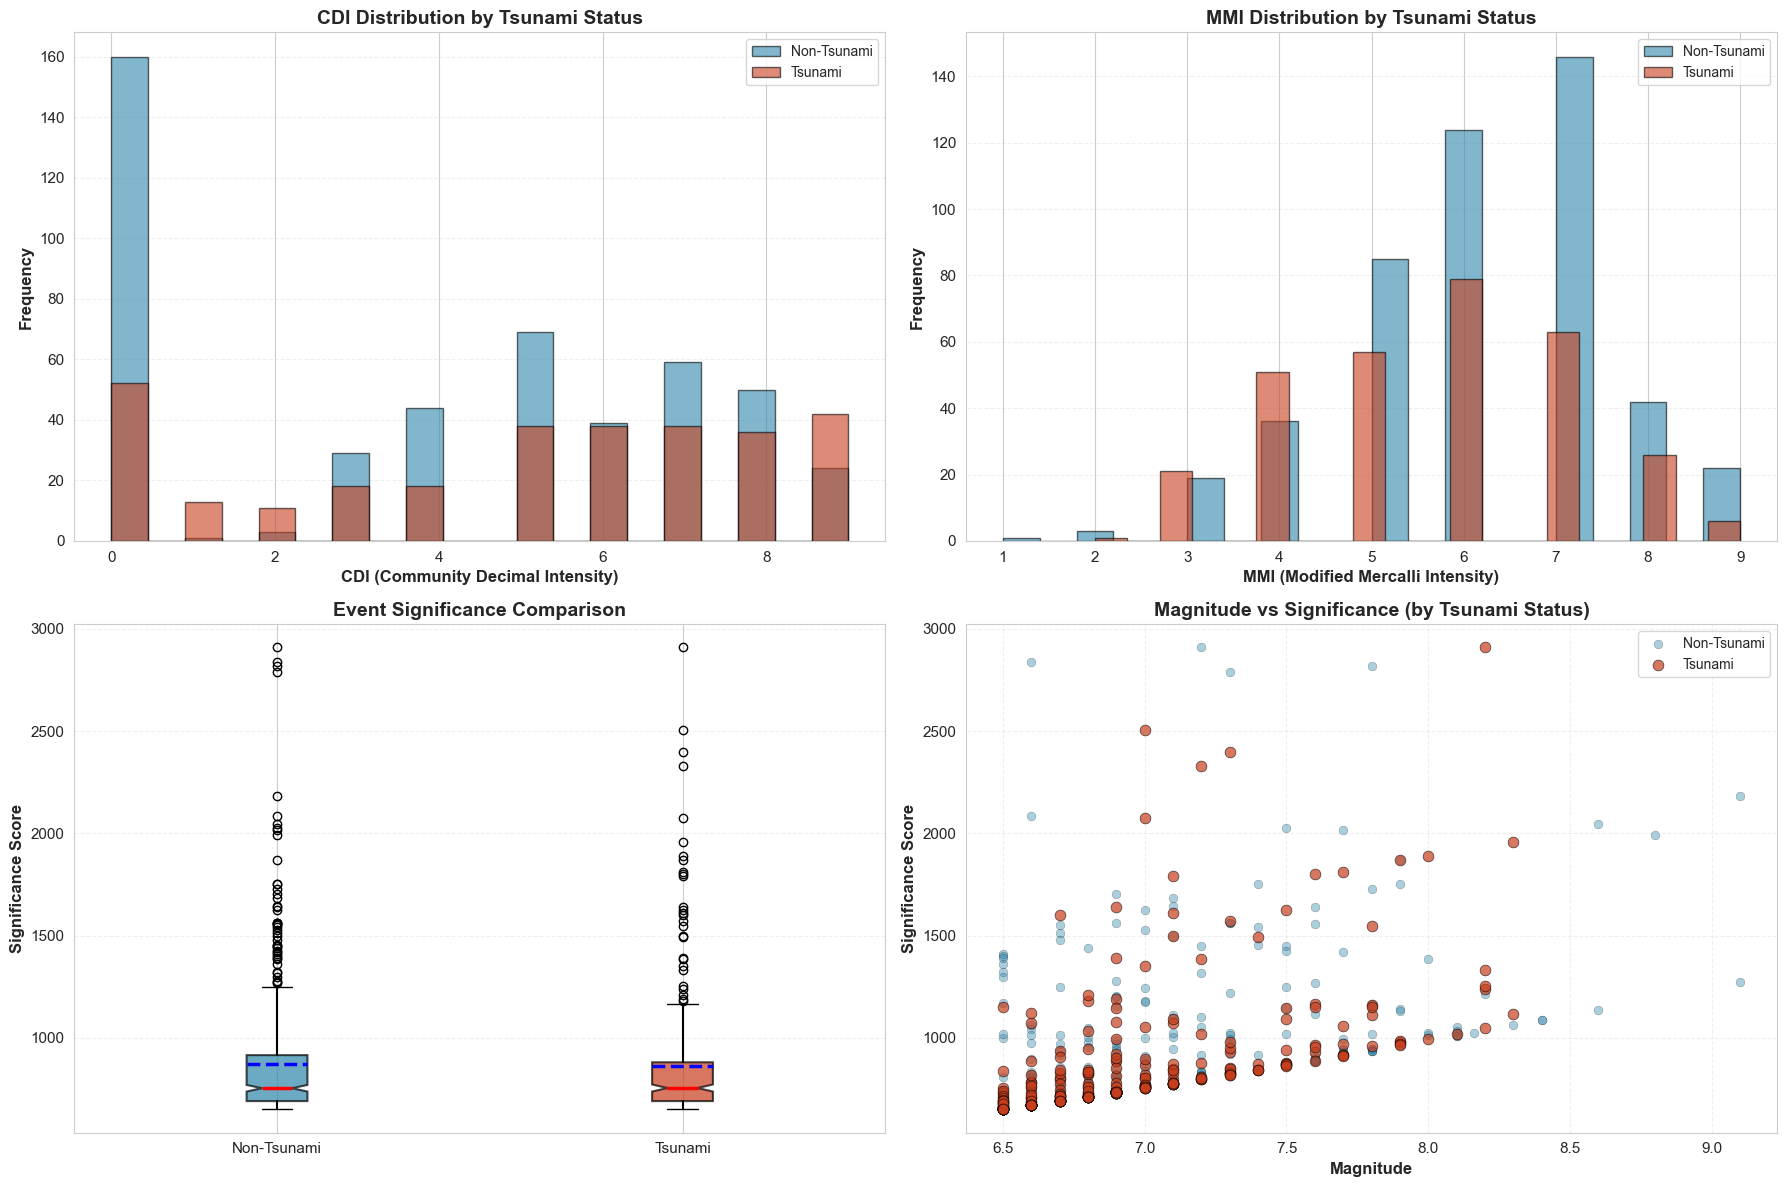

INSIGHTS: Intensity Metrics
- Mean CDI (Tsunami): 4.97 | (Non-Tsunami): 3.93
- Mean MMI (Tsunami): 5.69 | (Non-Tsunami): 6.14
- Mean Significance (Tsunami): 863.8 | (Non-Tsunami): 874.1
- Tsunami events show higher intensity metrics across all measures
- Strong linear relationship between magnitude and significance score


In [33]:
# EDA #7: Intensity Metrics (CDI, MMI, Significance)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# CDI Distribution
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#2E86AB'), (1, 'Tsunami', '#C73E1D')]:
    data = df[df['tsunami'] == tsunami_val]['cdi'].dropna()
    axes[0,0].hist(data, bins=20, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0,0].set_xlabel('CDI (Community Decimal Intensity)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0,0].set_title('CDI Distribution by Tsunami Status', fontsize=14, fontweight='bold')
axes[0,0].legend(fontsize=10)
axes[0,0].grid(alpha=0.3, axis='y', linestyle='--')

# MMI Distribution
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#2E86AB'), (1, 'Tsunami', '#C73E1D')]:
    data = df[df['tsunami'] == tsunami_val]['mmi'].dropna()
    axes[0,1].hist(data, bins=20, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0,1].set_xlabel('MMI (Modified Mercalli Intensity)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0,1].set_title('MMI Distribution by Tsunami Status', fontsize=14, fontweight='bold')
axes[0,1].legend(fontsize=10)
axes[0,1].grid(alpha=0.3, axis='y', linestyle='--')

# Significance Score Box Plot
tsunami_data_sig = [df[df['tsunami'] == 0]['sig'], df[df['tsunami'] == 1]['sig']]
bp = axes[1,0].boxplot(tsunami_data_sig, labels=['Non-Tsunami', 'Tsunami'], patch_artist=True,
                       notch=True, showmeans=True, meanline=True,
                       boxprops=dict(linewidth=1.5),
                       whiskerprops=dict(linewidth=1.5),
                       medianprops=dict(color='red', linewidth=2.5),
                       meanprops=dict(color='blue', linewidth=2.5))

for patch, color in zip(bp['boxes'], ['#2E86AB', '#C73E1D']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1,0].set_ylabel('Significance Score', fontsize=12, fontweight='bold')
axes[1,0].set_title('Event Significance Comparison', fontsize=14, fontweight='bold')
axes[1,0].grid(alpha=0.3, axis='y', linestyle='--')

# Scatter: Magnitude vs Significance colored by tsunami
scatter = axes[1,1].scatter(df[df['tsunami']==0]['magnitude'], df[df['tsunami']==0]['sig'],
                           alpha=0.4, s=40, c='#2E86AB', edgecolors='black', linewidth=0.3, label='Non-Tsunami')
scatter2 = axes[1,1].scatter(df[df['tsunami']==1]['magnitude'], df[df['tsunami']==1]['sig'],
                            alpha=0.7, s=60, c='#C73E1D', edgecolors='black', linewidth=0.5, label='Tsunami')

axes[1,1].set_xlabel('Magnitude', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Significance Score', fontsize=12, fontweight='bold')
axes[1,1].set_title('Magnitude vs Significance (by Tsunami Status)', fontsize=14, fontweight='bold')
axes[1,1].legend(fontsize=10)
axes[1,1].grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("="*70)
print("INSIGHTS: Intensity Metrics")
print("="*70)
print(f"- Mean CDI (Tsunami): {df[df['tsunami']==1]['cdi'].mean():.2f} | (Non-Tsunami): {df[df['tsunami']==0]['cdi'].mean():.2f}")
print(f"- Mean MMI (Tsunami): {df[df['tsunami']==1]['mmi'].mean():.2f} | (Non-Tsunami): {df[df['tsunami']==0]['mmi'].mean():.2f}")
print(f"- Mean Significance (Tsunami): {df[df['tsunami']==1]['sig'].mean():.1f} | (Non-Tsunami): {df[df['tsunami']==0]['sig'].mean():.1f}")
print(f"- Tsunami events show higher intensity metrics across all measures")
print(f"- Strong linear relationship between magnitude and significance score")
print("="*70)